# Non-Linear Data Relationships

## Projecting Data: Principal Component Analysis (PCA) vs Kernel PCA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA # loading libraries

In [9]:
np.random.seed(0)
data = np.random.rand(100, 6)
type(data) # numpy array; 100 observations with 5 characteristics 

numpy.ndarray

In [10]:
data[:5]

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411],
       [0.43758721, 0.891773  , 0.96366276, 0.38344152, 0.79172504,
        0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 , 0.0202184 ,
        0.83261985],
       [0.77815675, 0.87001215, 0.97861834, 0.79915856, 0.46147936,
        0.78052918],
       [0.11827443, 0.63992102, 0.14335329, 0.94466892, 0.52184832,
        0.41466194]])

In [11]:
def nonlinear_function(x):
    return np.sin(x) + x**3 # define a non-linear function

transformed_data = nonlinear_function(data) # apply the nonlinear function defined above

In [12]:
transformed_data[:5]

array([[0.68697592, 1.02157677, 0.78591924, 0.68009275, 0.48713388,
        0.87136628],
       [0.50754558, 1.48737705, 1.71618822, 0.43049069, 1.20784222,
        0.65252725],
       [0.7212783 , 1.59196531, 0.07133479, 0.08768054, 0.02022528,
        1.31691545],
       [1.17316348, 1.42286736, 1.76694374, 1.22715574, 0.54355133,
        1.17917403],
       [0.11965339, 0.85917905, 0.14580874, 1.6533249 , 0.64059599,
        0.47417939]])

### Principal Components Analysis (PCA)

In [13]:
pca = PCA(n_components = 2) # dimensionality reduction through PCA
reduced_data = pca.fit_transform(transformed_data) # fit the model and apply the dimensionality reduction

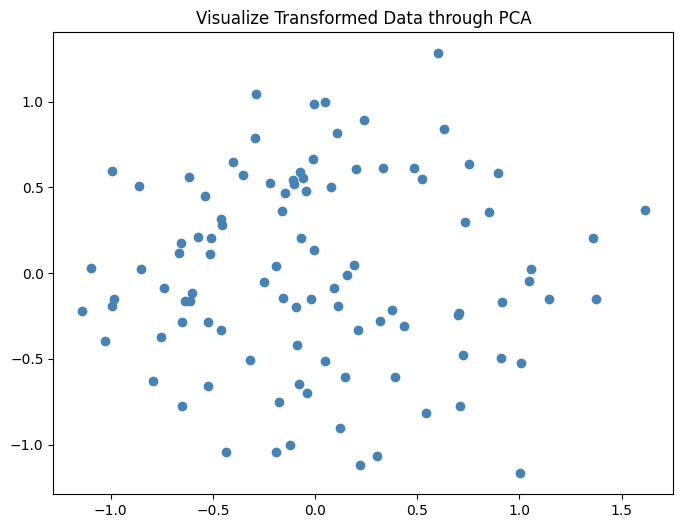

In [14]:
plt.figure(figsize = (8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker = 'o', c = 'steelblue')
plt.title('Visualize Transformed Data through PCA')
plt.show()

### Kernel PCA

In [16]:
kernel_pca = KernelPCA(n_components = 2, kernel = 'rbf') # dimensionality reduction through Kernel PCA
reduced_kernel_data = kernel_pca.fit_transform(transformed_data) # fit the model and apply the dimensionality reduction

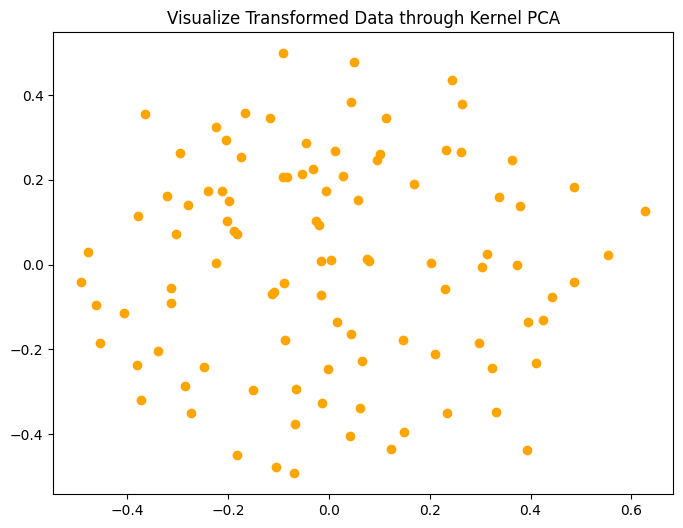

In [17]:
plt.figure(figsize = (8, 6))
plt.scatter(reduced_kernel_data[:, 0], reduced_kernel_data[:, 1], marker = 'o', c = 'orange')
plt.title('Visualize Transformed Data through Kernel PCA')
plt.show()

Since standard PCA assumes that the data lies on a **linear subspace**, it may not capture the structure of your data well after the nonlinear transformation `sin(x) + x^3`. Kernel PCA allows handle non-linear structures in the data.

## Polynomial Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # loading libraries

In [5]:
np.random.seed(0)
x = np.random.randn(100, 1)
y = 2 * (x**2) + 1 + np.random.randn(100, 1) # dependent variable y; nonlinear transformation function of x

In [14]:
x[:5] # original x 

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ],
       [1.86755799]])

In [15]:
lineal_model = LinearRegression()
lineal_model.fit(x, y) # fit a linear regression model

LinearRegression()

In [16]:
y_pred = lineal_model.predict(x) # fitted values

In [17]:
poly_features = PolynomialFeatures(degree = 2) 
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y) # fit a linear regression model to the transformed polynomial features and the y variable

LinearRegression()

In [13]:
x_poly[:5] # constant term; original x; x-squared

array([[1.        , 1.76405235, 3.11188068],
       [1.        , 0.40015721, 0.16012579],
       [1.        , 0.97873798, 0.95792804],
       [1.        , 2.2408932 , 5.02160233],
       [1.        , 1.86755799, 3.48777285]])

In [19]:
y_pred_poly = poly_model.predict(x_poly) # fitted values

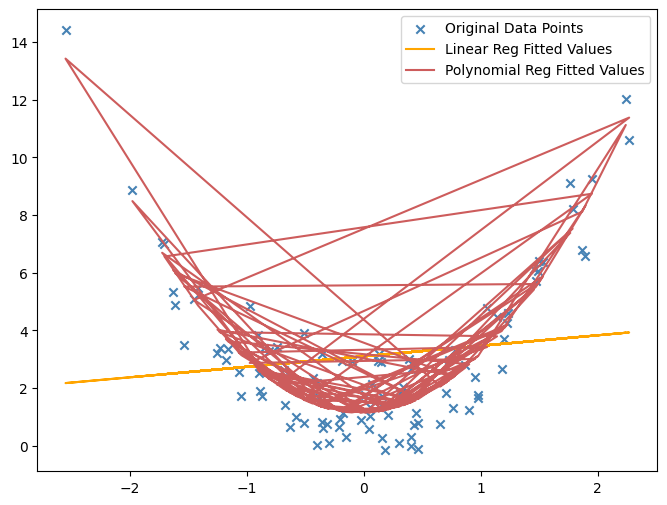

In [22]:
plt.figure(figsize = (8, 6))
plt.scatter(x, y, label = 'Original Data Points', color = 'steelblue', marker = 'x')
plt.plot(x, y_pred, label = 'Linear Reg Fitted Values', color = 'orange')
plt.plot(x, y_pred_poly, label = 'Polynomial Reg Fitted Values', color = 'indianred')
plt.legend()

Despite using a linear regression model, by **transforming the features into polynomial terms**, the model is able to fit a nonlinear pattern in the data. 

## Evaluating a Logistic Regression Model: Nonlinear Feature Transformations

In [59]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import log1p
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [60]:
spark = SparkSession.builder\
        .appName("Nonlinear Relationships")\
        .getOrCreate() # create a Spark session 

In [61]:
data = [
    (0, 1.0, 0.1, 0.1),
    (1, 0.0, 0.9, 0.8),
    (0, 0.0, 0.2, 0.5),
    (1, 1.0, 0.7, 0.9),
    (0, 1.0, 0.3, 0.1)
] # data

columns = ["label", "feature1", "feature2", "feature3"] # column names
df = spark.createDataFrame(data, schema=columns) # create a spark dataframe

In [62]:
df.show() # dataframe preview

+-----+--------+--------+--------+
|label|feature1|feature2|feature3|
+-----+--------+--------+--------+
|    0|     1.0|     0.1|     0.1|
|    1|     0.0|     0.9|     0.8|
|    0|     0.0|     0.2|     0.5|
|    1|     1.0|     0.7|     0.9|
|    0|     1.0|     0.3|     0.1|
+-----+--------+--------+--------+



In [63]:
df = df.withColumn("feature2_squared", df["feature2"] ** 2)
df = df.withColumn("feature3_log", log1p(df["feature3"])) # adding nonlinear transformations

In [64]:
df.show() # dataframe preview

+-----+--------+--------+--------+--------------------+-------------------+
|label|feature1|feature2|feature3|    feature2_squared|       feature3_log|
+-----+--------+--------+--------+--------------------+-------------------+
|    0|     1.0|     0.1|     0.1|0.010000000000000002|0.09531017980432487|
|    1|     0.0|     0.9|     0.8|                0.81| 0.5877866649021191|
|    0|     0.0|     0.2|     0.5| 0.04000000000000001| 0.4054651081081644|
|    1|     1.0|     0.7|     0.9| 0.48999999999999994| 0.6418538861723948|
|    0|     1.0|     0.3|     0.1|                0.09|0.09531017980432487|
+-----+--------+--------+--------+--------------------+-------------------+



In [65]:
assembler = VectorAssembler(
    inputCols = ["feature1", "feature2", "feature2_squared", "feature3_log"],
    outputCol = "features"
) # combine multiple features into a single vector column

In [66]:
assembled_data = assembler.transform(df) # apply VectorAssembler to the dataframe
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed = 42) # split data in training data (80%) and test data (20%)

In [51]:
assembled_data.show() # dataframe preview

+-----+--------+--------+--------+--------------------+-------------------+--------------------+
|label|feature1|feature2|feature3|    feature2_squared|       feature3_log|            features|
+-----+--------+--------+--------+--------------------+-------------------+--------------------+
|    0|     1.0|     0.1|     0.1|0.010000000000000002|0.09531017980432487|[1.0,0.1,0.010000...|
|    1|     0.0|     0.9|     0.8|                0.81| 0.5877866649021191|[0.0,0.9,0.81,0.5...|
|    0|     0.0|     0.2|     0.5| 0.04000000000000001| 0.4054651081081644|[0.0,0.2,0.040000...|
|    1|     1.0|     0.7|     0.9| 0.48999999999999994| 0.6418538861723948|[1.0,0.7,0.489999...|
|    0|     1.0|     0.3|     0.1|                0.09|0.09531017980432487|[1.0,0.3,0.09,0.0...|
+-----+--------+--------+--------+--------------------+-------------------+--------------------+



In [53]:
log_reg = LogisticRegression(featuresCol = 'features', labelCol = 'label')
log_reg_model = log_reg.fit(train_data) # fit the logistic regression model 
predictions = log_reg_model.transform(test_data) # apply model to test data

In [54]:
evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol = "prediction", metricName = "accuracy") # define an evaluator
accuracy = evaluator.evaluate(predictions) # evaluate the model on test data

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [55]:
predictions.select("label", "prediction", "features").show()

+-----+----------+--------------------+
|label|prediction|            features|
+-----+----------+--------------------+
|    1|       1.0|[0.0,0.9,0.81,0.5...|
+-----+----------+--------------------+



In [67]:
spark.stop() # stop spark session